....

In [2]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#xgboost
import xgboost as xgb

#Do not show warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
# importing the data
df = pd.read_csv('./data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#formating the column names, make them lower case and replacing " " with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
print(f"The shape of the initial data: {df.shape}")

The shape of the initial data: (145460, 23)


In [6]:
#getting the column names
col_names = df.columns
col_names

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [7]:
#printing the data statistical information
df.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
#Just tranposed information, much better to get the sense of the data, imho
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mintemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
maxtemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
windgustspeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
windspeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
windspeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Now let's summarize the info from the data.

In [9]:
#Getting vital information neccesary for the future data cleaning.

def check(df):
    lst=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        lst.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(lst)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [10]:
check(df)

,column,dtypes,nunique,sum_null
0,date,object,3436,0
1,location,object,49,0
2,mintemp,float64,389,1485
3,maxtemp,float64,505,1261
4,rainfall,float64,681,3261
5,evaporation,float64,358,62790
6,sunshine,float64,145,69835
7,windgustdir,object,16,10326
8,windgustspeed,float64,67,10263
9,winddir9am,object,16,10566


In [11]:
#check the percentage of missing values
len = df.shape[0]
def calculate_missing_percent(df):
    lst=[]
    columns=df.columns
    for col in columns:
        missing_percent=round(df[col].isnull().sum()/df.shape[0]*100, 2)
        lst.append([col, missing_percent])
    df_missing_percent=pd.DataFrame(lst)
    df_missing_percent.columns=['column', 'missing values %']
    return df_missing_percent

calculate_missing_percent(df)

,column,missing values %
0,date,0.00
1,location,0.00
2,mintemp,1.02
3,maxtemp,0.87
4,rainfall,2.24
5,evaporation,43.17
6,sunshine,48.01
7,windgustdir,7.10
8,windgustspeed,7.06
9,winddir9am,7.26


array([[<AxesSubplot:title={'center':'mintemp'}>,
        <AxesSubplot:title={'center':'maxtemp'}>,
        <AxesSubplot:title={'center':'rainfall'}>,
        <AxesSubplot:title={'center':'evaporation'}>],
       [<AxesSubplot:title={'center':'sunshine'}>,
        <AxesSubplot:title={'center':'windgustspeed'}>,
        <AxesSubplot:title={'center':'windspeed9am'}>,
        <AxesSubplot:title={'center':'windspeed3pm'}>],
       [<AxesSubplot:title={'center':'humidity9am'}>,
        <AxesSubplot:title={'center':'humidity3pm'}>,
        <AxesSubplot:title={'center':'pressure9am'}>,
        <AxesSubplot:title={'center':'pressure3pm'}>],
       [<AxesSubplot:title={'center':'cloud9am'}>,
        <AxesSubplot:title={'center':'cloud3pm'}>,
        <AxesSubplot:title={'center':'temp9am'}>,
        <AxesSubplot:title={'center':'temp3pm'}>]], dtype=object)

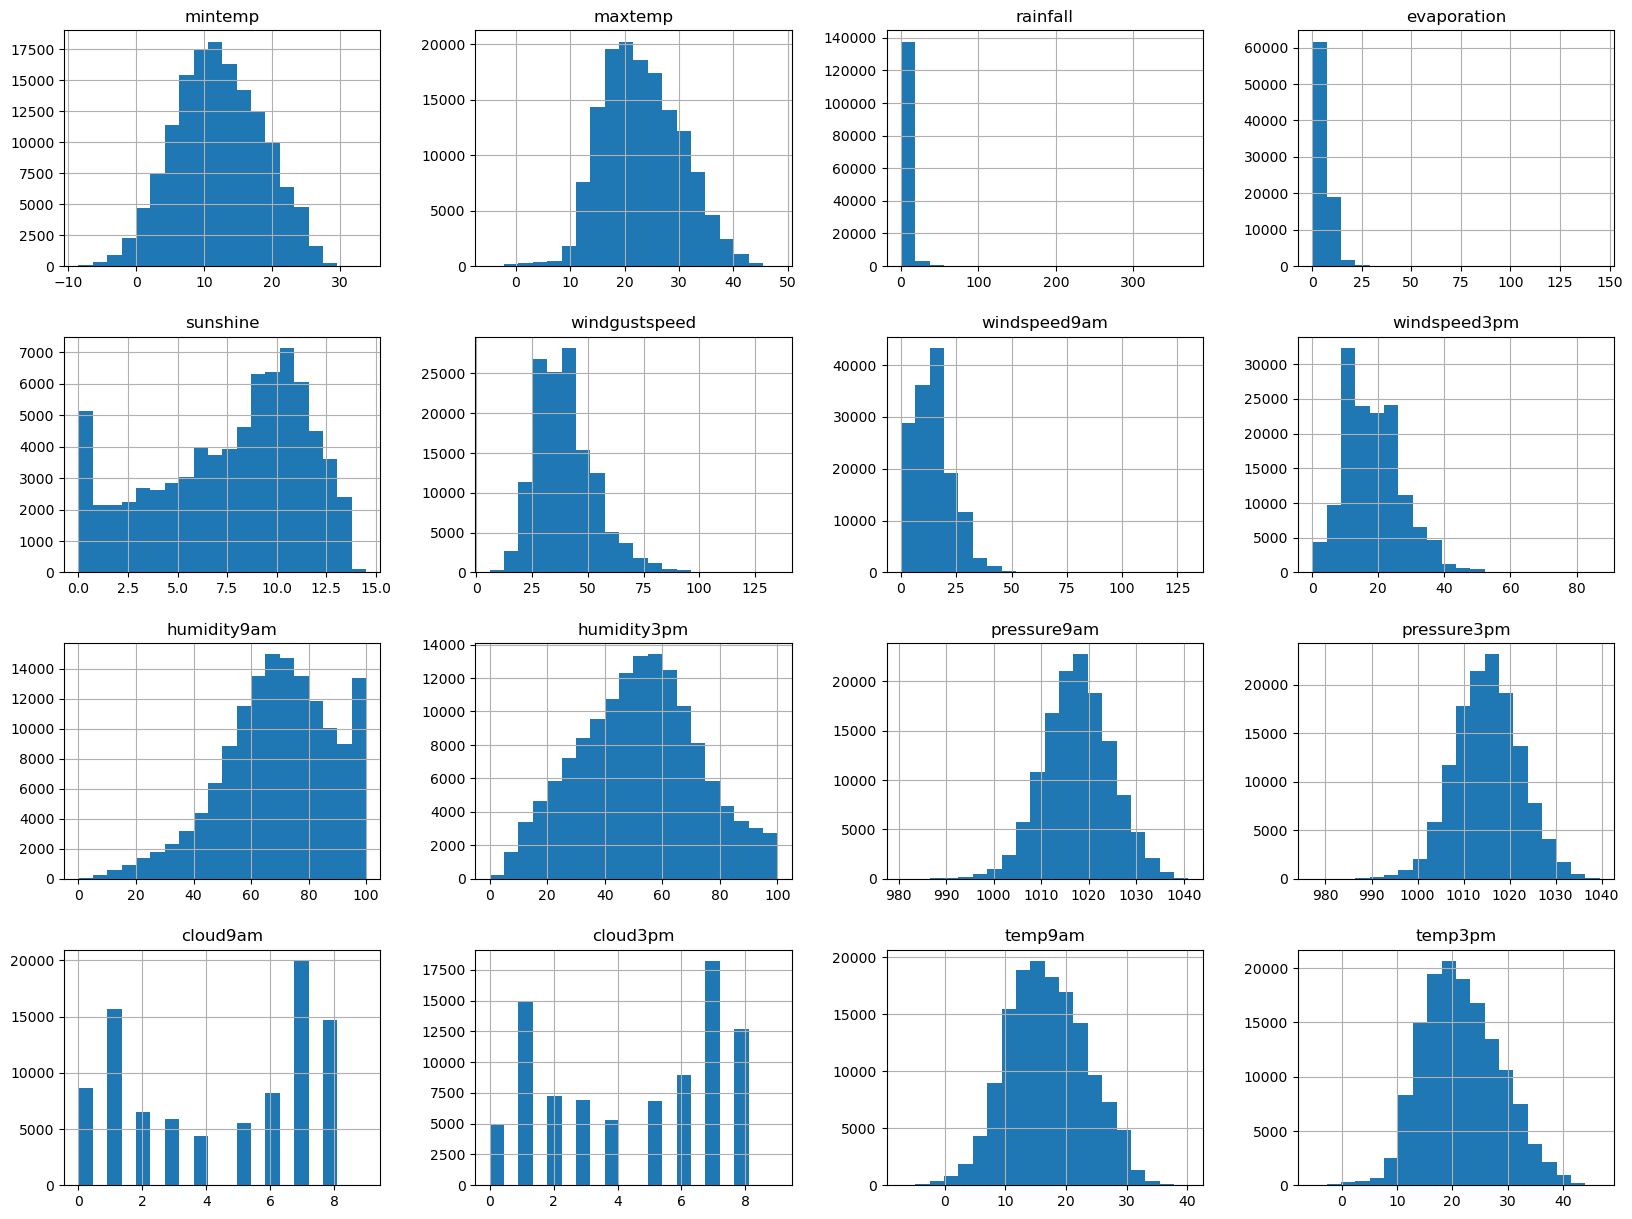

In [12]:
df[col_names].hist(figsize=(20, 15), bins=20)

As can be seen ['Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am'] columns has more very high percentage of missing values... 

Now let's visulize the data

In [13]:
print(df['raintomorrow'].isnull().sum())

print(df['raintomorrow'].unique())

print(df['raintomorrow'].value_counts())

3267
['No' 'Yes' nan]
No     110316
Yes     31877
Name: raintomorrow, dtype: int64


As we can see there are some missing values of the target variable, percentage is very low < 2.25%, so I have decided the simply drop them.

In [14]:
df = df.dropna(how='any',
                    subset=['raintomorrow'])

In [15]:
print(df['raintomorrow'].isnull().sum())

print(df['raintomorrow'].unique())

print(df['raintomorrow'].value_counts())

0
['No' 'Yes']
No     110316
Yes     31877
Name: raintomorrow, dtype: int64


In [16]:
#also I will remove missing raintoday column
df = df.dropna(how='any',
                    subset=['raintoday'])

<AxesSubplot:xlabel='raintomorrow', ylabel='count'>

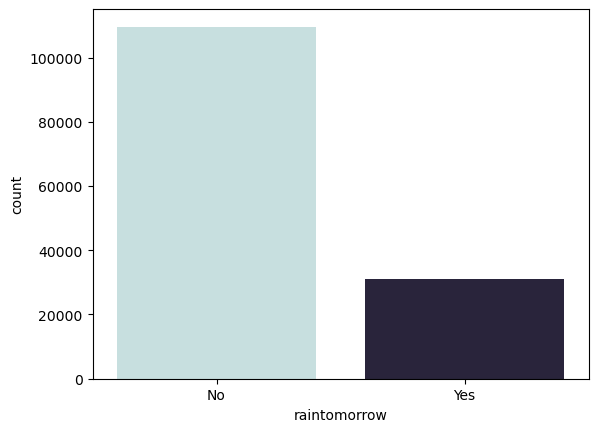

In [17]:
sns.countplot(x = df['raintomorrow'], palette ="ch:start=.2,rot=-.3")

Now let's study categorical and Numerical columns

In [18]:
#df_base.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(f"There are {7} : {categorical_columns}:")

#Come back and fix it...

There are 7 : ['date', 'location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']:


Now date enginnering, we need to check data type and split into year, month and date...

In [19]:
a = df['date'].dtypes == 'O'

print(f'Is Date an Object type? {a}')

Is Date an Object type? True


In [20]:
#now lets split date object into year, month, day
#converting from object into datetime type
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [21]:
#To check if we did everythin OK
df.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [22]:
#remove original Date column
df.drop('date', axis=1, inplace=True)

Now lets check numerical columns

In [23]:
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)
print(f"There are {19} : {numerical_columns}:")

There are 19 : ['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine', 'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'year', 'month', 'day']:


In numerical values, from the initial look, we have mssing values and outliers, 
maybe we need to apply also log1p!

For outlier detection I will use https://pub.towardsai.net/outlier-detection-and-treatment-a-beginners-guide-c44af0699754 tutorial.

In [24]:
# mapping 
rain_map = {'Yes':1, 'No':0}
df['raintomorrow'] = df['raintomorrow'].map(rain_map)

In [25]:
df.sample(15)

,location,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,...,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow,year,month,day
56780,Ballarat,4.1,12.6,6.6,NaN,NaN,SW,46.0,SSW,SSW,...,1021.0,NaN,8.0,6.8,10.7,Yes,0,2013,10,3
137626,AliceSprings,10.4,17.2,0.0,6.6,0.6,SSE,39.0,SSE,SE,...,1021.7,8.0,8.0,13.1,16.5,No,0,2013,6,2
135455,Launceston,3.4,19.1,0.0,NaN,NaN,NW,33.0,NNE,NW,...,NaN,NaN,1.0,10.8,18.7,No,0,2015,10,19
39438,WaggaWagga,13.5,32.1,0.0,NaN,NaN,NE,44.0,SSE,E,...,1020.9,NaN,NaN,20.6,31.0,No,0,2017,3,18
50904,Tuggeranong,5.2,14.8,0.0,NaN,NaN,WSW,11.0,WNW,SW,...,1019.1,NaN,NaN,12.3,14.4,No,0,2014,4,25
77566,Portland,14.3,19.4,6.4,2.4,NaN,NNW,43.0,NNW,NW,...,1010.0,7.0,NaN,15.9,19.0,Yes,1,2016,4,29
50862,Tuggeranong,14.9,27.1,0.0,NaN,NaN,NNW,30.0,E,NNW,...,1013.1,NaN,NaN,19.2,24.7,No,0,2014,3,14
123604,Perth,11.2,21.2,0.4,6.0,10.0,SW,39.0,WSW,SW,...,1016.4,5.0,4.0,17.9,19.2,No,0,2016,11,11
29240,Richmond,19.7,37.7,0.0,NaN,NaN,SW,80.0,ENE,WSW,...,1007.5,NaN,NaN,25.6,37.7,No,1,2014,12,3
72493,Mildura,11.2,28.4,0.0,14.6,12.5,SW,46.0,WSW,SW,...,1013.0,7.0,4.0,17.6,25.7,No,0,2014,12,30


Taking care of missing values!

In [26]:
df["mintemp"]= df["mintemp"].fillna(df["mintemp"].mean())
df["maxtemp"]= df["maxtemp"].fillna(df["maxtemp"].mean())
df["evaporation"]= df["evaporation"].fillna(df["evaporation"].mean())
df["sunshine"]= df["sunshine"].fillna(df["sunshine"].mean())
df["windgustspeed"]= df["windgustspeed"].fillna(df["windgustspeed"].mean())
df["rainfall"]= df["rainfall"].fillna(df["rainfall"].mean())
df["windspeed9am"]= df["windspeed9am"].fillna(df["windspeed9am"].mean())
df["windspeed3pm"]= df["windspeed3pm"].fillna(df["windspeed3pm"].mean())
df["humidity9am"]= df["humidity9am"].fillna(df["humidity9am"].mean())
df["humidity3pm"]= df["humidity3pm"].fillna(df["humidity3pm"].mean())
df["pressure9am"]= df["pressure9am"].fillna(df["pressure9am"].mean())
df["pressure3pm"]= df["pressure3pm"].fillna(df["pressure3pm"].mean())
df["cloud9am"]= df["cloud9am"].fillna(df["cloud9am"].mean())
df["cloud3pm"]= df["cloud3pm"].fillna(df["cloud3pm"].mean())
df["temp9am"]= df["temp9am"].fillna(df["temp9am"].mean())
df["temp3pm"]= df["temp3pm"].fillna(df["temp3pm"].mean())


#Filling the missing values for continuous variables with mode
df['winddir9am'] = df['winddir9am'].fillna(df['winddir9am'].mode()[0])
df['windgustdir'] = df['windgustdir'].fillna(df['windgustdir'].mode()[0])
df['winddir3pm'] = df['winddir3pm'].fillna(df['winddir3pm'].mode()[0])

Now let's split the data into a test, validation, train sets

In [27]:
df_temp, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_temp, test_size=0.25, random_state=42)

In [28]:
y_train = df_train["raintomorrow"]  # dependent or target
y_test = df_test["raintomorrow"] 
y_val = df_val["raintomorrow"] 

df_train = df_train.drop(["raintomorrow"], axis = 1)
df_test = df_test.drop(["raintomorrow"], axis = 1)
df_val = df_val.drop(["raintomorrow"], axis = 1)

In [29]:
#To check how the correctly the data was splitted
print(f'The size of the train data is: {df_train.shape} \nThe size of the test data is: {df_test.shape} \nThe size of validation data is: {df_val.shape}')

The size of the train data is: (84471, 24) 
The size of the test data is: (28158, 24) 
The size of validation data is: (28158, 24)


In [30]:
df_train.columns

Index(['location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'year', 'month', 'day'],
      dtype='object')

In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [32]:
X_train = df_train
X_val = df_val
X_test = df_test

In [33]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

dict_test = df_test.to_dict(orient='records')
X_test = dv.transform(dict_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7016947074122267

In [35]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)


In [36]:
xgb_params = {
 'eta': 0.3,
 'max_depth': 6,
 'min_child_weight': 1,
 'objective': 'binary:logistic',
 'nthread': -1,
 'seed': 1,
 'silent': 1
}

In [37]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)


[23:34:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [38]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)


0.874995822675773

In [39]:
from sklearn.metrics import accuracy_score

In [59]:
import optuna
from optuna.samplers import TPESampler

In [49]:
def objective(trial):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_val, label=y_val)

    param = {
        "max_depth" : trial.suggest_int("max_depth", 2, 10, step=1, log=False),
        "eta": trial.suggest_float("eta", 0.05, 1, step=0.05, log=False),
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        #"lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        #"alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }
    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_val, pred_labels)
    return accuracy

In [60]:
optuna.logging.set_verbosity(optuna.logging.WARNING) #<- this removes the intermediate results!

sampler = TPESampler(seed=42)
study = optuna.create_study(direction = "maximize", sampler=sampler)
study.optimize(objective, n_trials = 100)
trial = study.best_trial
print("Best Score: ", trial.value)
print("Best Params: ")
for key, value in trial.params.items():
    print("  {}: {}".format(key, value))

[0]	validation-auc:0.83622
[1]	validation-auc:0.85635
[2]	validation-auc:0.86411
[3]	validation-auc:0.86715
[4]	validation-auc:0.86884
[5]	validation-auc:0.87140
[6]	validation-auc:0.87187
[7]	validation-auc:0.87343
[8]	validation-auc:0.87482
[9]	validation-auc:0.87548
[0]	validation-auc:0.80561
[1]	validation-auc:0.82125
[2]	validation-auc:0.82872
[3]	validation-auc:0.83211
[4]	validation-auc:0.83684
[5]	validation-auc:0.83724
[6]	validation-auc:0.83950
[7]	validation-auc:0.84029
[8]	validation-auc:0.84322
[9]	validation-auc:0.84489
[0]	validation-auc:0.77270
[1]	validation-auc:0.81066
[2]	validation-auc:0.83777
[3]	validation-auc:0.84654
[4]	validation-auc:0.85233
[5]	validation-auc:0.85463
[6]	validation-auc:0.85635
[7]	validation-auc:0.85796
[8]	validation-auc:0.86015
[9]	validation-auc:0.86127
[0]	validation-auc:0.80561
[1]	validation-auc:0.82841
[2]	validation-auc:0.83873
[3]	validation-auc:0.84360
[4]	validation-auc:0.85152
[5]	validation-auc:0.85420
[6]	validation-auc:0.85779
[

In [51]:
optuna.visualization.plot_optimization_history(study)

In [52]:
optuna.visualization.plot_param_importances(study)

In [61]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

param_final = {
    "max_depth": 9,
    "eta": 0.35,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "booster": "dart",
    }

# Add a callback for pruning.
pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")

model = xgb.train(param_final, dtrain)

preds = model.predict(dtest)
pred_labels = np.rint(preds)
accuracy = round(accuracy_score(y_val, pred_labels)*100, 1)

print(accuracy)

85.6


In [54]:
import pickle
with open('rain_model.bin', 'wb') as f_out: 
    pickle.dump((dv, model), f_out) 